# load_linnerud

In [1]:
from sklearn.datasets import load_linnerud
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
data = load_linnerud()

In [3]:
print(type(data))

<class 'sklearn.utils.Bunch'>


In [4]:
print(data.keys())

dict_keys(['data', 'DESCR', 'data_filename', 'feature_names', 'target_names', 'target_filename', 'target'])


In [5]:
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df['target0'] = data.target[:, 0]
df['target1'] = data.target[:, 1]
df['target2'] = data.target[:, 2]

In [6]:
df.head()

,Chins,Situps,Jumps,target0,target1,target2
0,5.0,162.0,60.0,191.0,36.0,50.0
1,2.0,110.0,60.0,189.0,37.0,52.0
2,12.0,101.0,101.0,193.0,38.0,58.0
3,12.0,105.0,37.0,162.0,35.0,62.0
4,13.0,155.0,58.0,189.0,35.0,46.0


In [7]:
df.tail()

,Chins,Situps,Jumps,target0,target1,target2
15,12.0,210.0,120.0,202.0,37.0,62.0
16,4.0,60.0,25.0,176.0,37.0,54.0
17,11.0,230.0,80.0,157.0,32.0,52.0
18,15.0,225.0,73.0,156.0,33.0,54.0
19,2.0,110.0,43.0,138.0,33.0,68.0


In [8]:
df.describe()

,Chins,Situps,Jumps,target0,target1,target2
count,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000
mean,9.450000,145.550000,70.30000,178.600000,35.400000,56.100000
std,5.286278,62.566575,51.27747,24.690505,3.201973,7.210373
min,1.000000,50.000000,25.00000,138.000000,31.000000,46.000000
25%,4.750000,101.000000,39.50000,160.750000,33.000000,51.500000
50%,11.500000,122.500000,54.00000,176.000000,35.000000,55.000000
75%,13.250000,210.000000,85.25000,191.500000,37.000000,60.500000
max,17.000000,251.000000,250.00000,247.000000,46.000000,74.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
Chins      20 non-null float64
Situps     20 non-null float64
Jumps      20 non-null float64
target0    20 non-null float64
target1    20 non-null float64
target2    20 non-null float64
dtypes: float64(6)
memory usage: 1.0 KB


In [10]:
print(df.isnull().sum())

Chins      0
Situps     0
Jumps      0
target0    0
target1    0
target2    0
dtype: int64


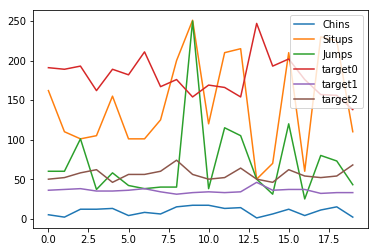

In [11]:
df.plot()

In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as data_utils

In [13]:
class LinnerudModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinnerudModel, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, 16),
            nn.ReLU(),
            nn.Linear(16, output_size)
        )
        
    def forward(self, x):
        output = self.model(x)
        return output

In [14]:
X = torch.Tensor(data.data)
y = torch.Tensor(data.target)

In [15]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # train과 test를 8:2로 분할

In [16]:
model = LinnerudModel(3, 3)

In [17]:
n = 0
y = model(X_train[n]).detach() # 더 이상 연산을 추적하지 않는다
print(y, y_train[n])

tensor([17.1383,  8.6683, -8.3495]) tensor([167.,  34.,  60.])


In [18]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [19]:
print(model)

LinnerudModel(
  (model): Sequential(
    (0): Linear(in_features=3, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=3, bias=True)
  )
)


In [20]:
criterion = nn.MSELoss()

n_epochs = 100 # 100회 학습

avg_loss = 0 
for epoch in range(n_epochs):
    for i in range(len(X_train)):
        y = torch.unsqueeze(model(X_train[i]), dim=0)
        target = torch.unsqueeze(y_train[i], dim=0)
        loss = criterion(y, target)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        avg_loss += loss.data
    avg_loss /= len(X_train)
    if epoch % 10 == 0:
        print('epoch {}th loss: {}'.format(epoch, avg_loss))

epoch 0th loss: 9379.3349609375
epoch 10th loss: 2659.2900390625
epoch 20th loss: 2532.465087890625
epoch 30th loss: 2523.811279296875
epoch 40th loss: 2515.863525390625
epoch 50th loss: 2507.692626953125
epoch 60th loss: 2499.927978515625
epoch 70th loss: 2492.093994140625
epoch 80th loss: 2484.349609375
epoch 90th loss: 2476.484375


In [21]:
n = 0
y = model(X_train[n]).detach() # 더 이상 연산을 추적하지 않는다
print(y, y_train[n])

tensor([122.9168,  23.8783,  41.3044]) tensor([167.,  34.,  60.])


In [22]:
model = LinnerudModel(3, 3)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

n_epochs = 10000 # 10000회 학습

avg_loss = 0 
for epoch in range(n_epochs):
    y = model(X_train)
    loss = criterion(y, y_train).sum()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 1000 == 0:
        print('epoch {}th loss: {}'.format(epoch, loss.data))

epoch 0th loss: 13476.5458984375
epoch 1000th loss: 2309.253173828125
epoch 2000th loss: 2198.89599609375
epoch 3000th loss: 1931.9586181640625
epoch 4000th loss: 1432.1751708984375
epoch 5000th loss: 867.232421875
epoch 6000th loss: 495.1152038574219
epoch 7000th loss: 250.4020538330078
epoch 8000th loss: 138.41978454589844
epoch 9000th loss: 104.9531478881836


In [23]:
n = 4
y = model(X_train[n]).detach() # 더 이상 연산을 추적하지 않는다
print(y, y_train[n])

tensor([162.5770,  33.5633,  53.0092]) tensor([154.,  34.,  64.])


In [24]:
model = LinnerudModel(3, 3)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0005)
criterion = nn.MSELoss()

n_epochs = 50000 # 50000회 학습

list_training_loss = []
list_test_loss = []

for epoch in range(n_epochs):
    model.train()
    y = model(X_train)
    loss = criterion(y, y_train).sum()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 5000 == 0:
        model.eval()
        y_pred = model(X_test)
        test_loss = criterion(y_pred, y_test).sum()
        print('epoch {}th training loss: {} test loss: {}'.format(epoch, loss.data, test_loss.data))
        list_training_loss.append(loss.data)
        list_test_loss.append(test_loss.data)

epoch 0th training loss: 7744.9453125 test loss: 7533.34814453125
epoch 5000th training loss: 1785.66796875 test loss: 18334.755859375
epoch 10000th training loss: 304.2828063964844 test loss: 29681.248046875
epoch 15000th training loss: 37.87772750854492 test loss: 20551.009765625
epoch 20000th training loss: 24.08831024169922 test loss: 23565.8671875
epoch 25000th training loss: 23.16638946533203 test loss: 24158.388671875
epoch 30000th training loss: 22.97254753112793 test loss: 24368.833984375
epoch 35000th training loss: 22.938997268676758 test loss: 24486.578125
epoch 40000th training loss: 22.916412353515625 test loss: 24510.0703125
epoch 45000th training loss: 22.913145065307617 test loss: 24526.3515625


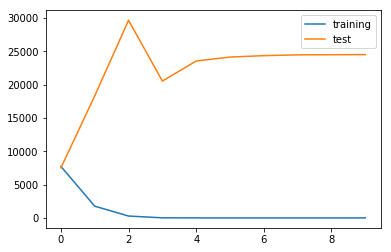

In [25]:
import matplotlib.pyplot as plt

plt.plot(list_training_loss, label='training')
plt.plot(list_test_loss, label='test')
plt.legend()
plt.show()

In [26]:
from sklearn.metrics import r2_score

with torch.no_grad():
    y_pred = model(X_test)
    score = r2_score(y_test, y_pred)
    print(score)

-235.53290439343235
